In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline

### Checkando linearidade

In [2]:
t = np.linspace(-10, 10, 1000)
#sinais x1 e x2 para serem testados no sistema
x1 = lambda t: np.sin(t)
x2 = lambda t: (t % (2*np.pi))/np.pi

def checkLinearity(Tr, titleStr):
    x1plusx2 = lambda t: x1(t)+x2(t)
    plt.subplot(121)
    plt.plot(t, x1(t), label=r'$x_1(t)$')
    plt.plot(t, x2(t), label=r'$x_2(t)$')
    plt.plot(t, x1plusx2(t), label=r'$x_1(t)+x_2(t)$')
    plt.ylim((-5,5)); plt.grid(True); plt.legend(loc='best', fontsize=10)
    plt.xlabel('$t$'); plt.ylabel('$x(t)$')
    
    plt.subplot(122)
    plt.plot(t, Tr(x1)(t), label=r'$Tr\{x_1(t)\}$')
    plt.plot(t, Tr(x2)(t), label=r'$Tr\{y_2(t)\}$')

    #se essas duas forem iguais é linear
    plt.plot(t, Tr(x1)(t)+Tr(x2)(t), 'k--', lw=3, label=r'$Tr\{x_1(t)\}+Tr\{x_2(t)\}$')
    plt.plot(t, Tr(x1plusx2)(t), label=r'$Tr\{x_1(t)+x_2(t)\}$')

    
    plt.legend(ncol=2, loc='best', fontsize=10);
    plt.title('Tr: %s' % titleStr); plt.grid(True)
    plt.xlabel('$t$'); plt.ylabel('$x(t)$')
    
    plt.ylim((-5,5))

    #compara a transformação da soma dos sinais com a soma dos sinais transformados
    are_equal = np.allclose(Tr(x1)(t) + Tr(x2)(t), Tr(x1plusx2)(t))

    if are_equal:
        print("O sistema é linear.")
    else:
        print("O sistema não é linear.")


O sistema é linear.


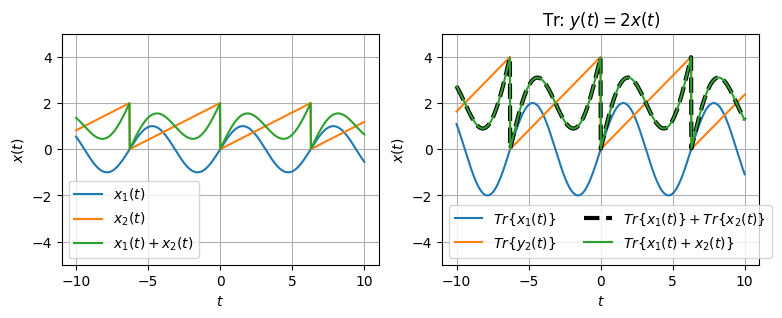

In [4]:
plt.figure(figsize=(9,3))
def Tr(x):
    return lambda t: 2*x(t)
checkLinearity(Tr, '$y(t)=2x(t)$')

O sistema não é linear.


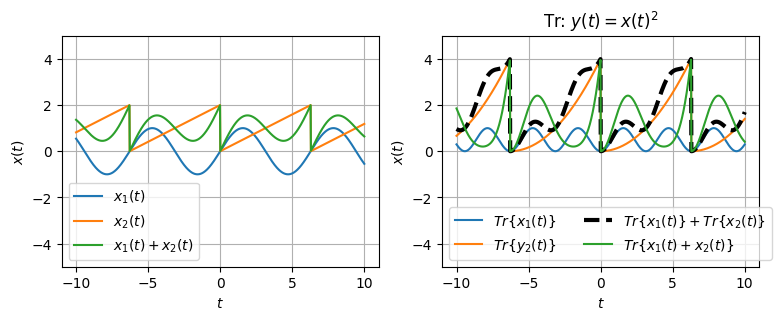

In [4]:
plt.figure(figsize=(9,3))
def Tr(x):
    return lambda t: x(t)**2
checkLinearity(Tr, '$y(t)=x(t)^2$')

### Checkando Casualidade

Sistema é casual
Sistema não é casual


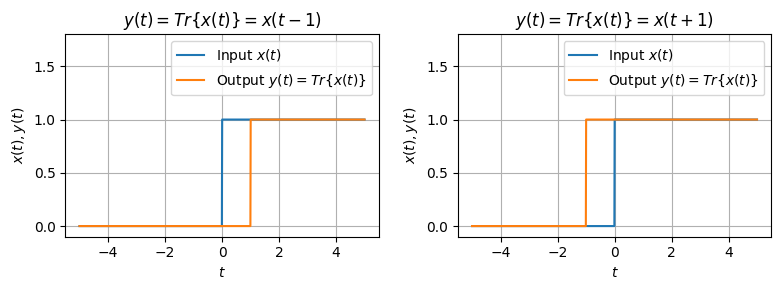

In [9]:
t = np.linspace(-5, 5, 1000)
x = lambda t: np.where(t >= 0, 1.0, 0.0)

def checkCausality(Tr):
    plt.plot(t, x(t), label='Input $x(t)$')
    plt.plot(t, Tr(x)(t), label=r'Output $y(t)=Tr\{x(t)\}$')
    plt.grid(True); plt.legend(fontsize=10); plt.ylim((-0.1, 1.8))
    plt.xlabel('$t$'); plt.ylabel('$x(t),y(t)$')
    
    output = Tr(x)(0)
    if (output > 0):
         print("Sistema não é casual")
    elif( output<=0):
        print("Sistema é casual")
    
  
plt.figure(figsize=(8,3))
plt.subplot(121)
checkCausality(Tr1)
plt.title(r'$y(t)=Tr\{x(t)\}=x(t-1)$')

plt.subplot(122)
checkCausality(Tr2)
plt.title(r'$y(t)=Tr\{x(t)\}=x(t+1)$');
plt.tight_layout()

### Checkando Invariância

In [6]:
t = np.linspace(-2,4, 1000)
x = lambda t: np.exp(-t)*(t>=0).astype(float)

def showTimeInvariance(Tr):
    plt.subplot(121)
    plt.plot(t, x(t), label='$x(t)$')
    plt.plot(t, x(t-0.5), label=r'$x(t-\frac{1}{2})$')
    plt.plot(t, x(t-1), label=r'$x(t-1)$')
    plt.legend(fontsize=10)
    plt.xlabel('$t$')
    plt.grid(True)
    
    plt.subplot(122)
    y1 = Tr(x)
    y2 = Tr(lambda t: x(t-0.5))
    y3 = Tr(lambda t: x(t-1))
    plt.plot(t, y1(t), label=r'$Tr\{x(t)\}$')
    plt.plot(t, y2(t), label=r'$Tr\{x(t-\frac{1}{2})\}$')
    plt.plot(t, y3(t), label=r'$Tr\{x(t-1)\}$')

    are_equal = np.allclose(y1(t) ,y2(t +0.5) , y3(t+1))

    if are_equal:
        print("O sistema é Invariante.")
    else:
        print("O sistema não é Invariante.")

    plt.xlabel('$t$')
    plt.legend(fontsize=10, loc='best'); plt.grid(True)

O sistema é Invariante.


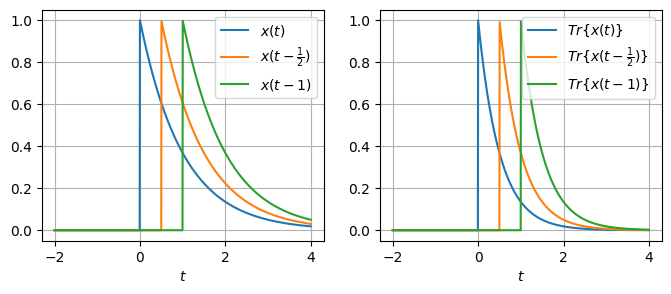

In [7]:
def Tr(x):
    return lambda t: x(t)**2
plt.figure(figsize=(8,3))
showTimeInvariance(Tr)

O sistema não é Invariante.


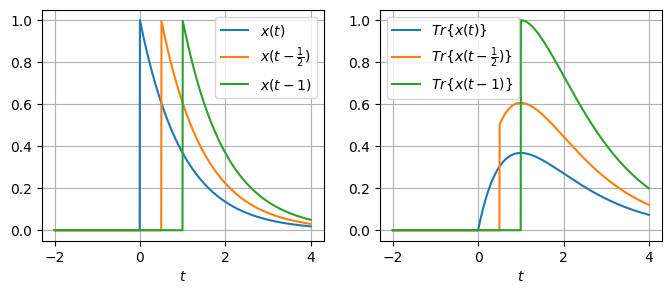

In [8]:
def Tr(x):
    return lambda t: t*x(t)
plt.figure(figsize=(8,3))
showTimeInvariance(Tr)

### Checkando Estabilidade

In [5]:
t = sp.symbols('t')
v = np.linspace(-10, 10, 1000)

# Sinal x1
x1 = lambda t: t + 4

def checkStable(Tr, titleStr):
    # Calcule o limite de Tr(x1) à medida que t tende ao infinito
    limite_Tr = sp.limit(Tr(x1)(t), t, sp.oo)

    # Calcule o limite de Tr(x1) à medida que t tende ao infinito negativo
    limite_Tr_neg = sp.limit(Tr(x1)(t), t, -sp.oo)

    # Verifique se o limite é infinito
    if limite_Tr == sp.oo and limite_Tr_neg == -sp.oo:
        print("O sistema Y(t) não é estável.")
    elif ( limite_Tr != sp.oo and limite_Tr_neg != -sp.oo ):
        print("O sistema é estável.")   

    plt.subplot(121)
    plt.plot(v, x1(v), label=r'$x_1(t)$')
    plt.ylim((-5,5)); plt.grid(True); plt.legend(loc='best', fontsize=10)
    plt.xlabel('$t$'); plt.ylabel('$x(t)$')
    
    plt.subplot(122)
    plt.plot(v, Tr(x1)(v), label=r'$Tr{x_1(t)}$')
    
    plt.legend(ncol=2, loc='best', fontsize=10);
    plt.title('Tr: %s' % titleStr); plt.grid(True)
    plt.xlabel('$t$'); plt.ylabel('$x(t)$')
    
    plt.ylim((-5,5))
    

O sistema é estável.


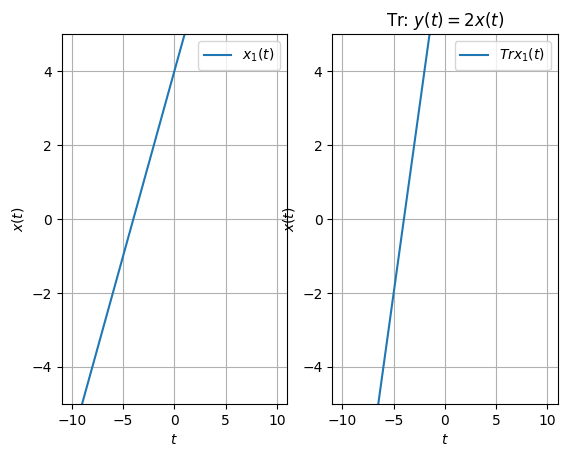

In [7]:
# Sistema Tr
def Tr(x):
    return lambda t: 2 * x(t)
checkStable(Tr, '$y(t)=2x(t)$')

O sistema é estável.


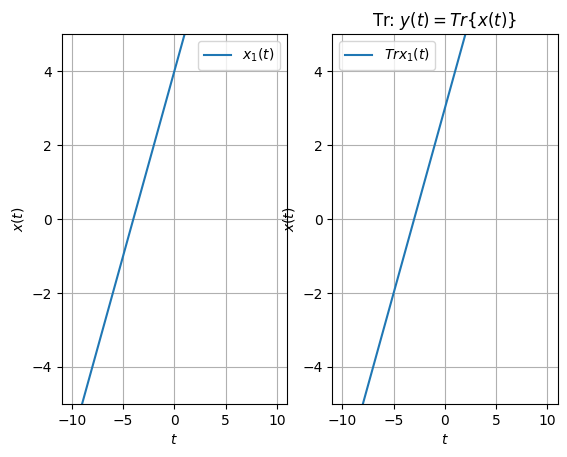

In [6]:
t = np.linspace(-5, 5, 1000)
x = lambda t: np.where(t >= 0, 1.0, 0.0)

def Tr(x):
    return lambda t: x(t-1) 
checkStable(Tr, '$y(t)=Tr\{x(t)\}$')

### Checkando Invertibilidade